In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [9]:
df = pd.read_csv("./data/cema_internship_task_2023.csv")

In [10]:
df.head()

,period,county,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months
0,Jan-23,Baringo County,3659,8.0,471.0,34.0,380.0,2620,85,739.0,731.0
1,Jan-23,Bomet County,1580,NaN,1.0,3.0,NaN,1984,41,86.0,16.0
2,Jan-23,Bungoma County,6590,24.0,98.0,154.0,23.0,4576,231,315.0,120.0
3,Jan-23,Busia County,7564,NaN,396.0,143.0,111.0,2239,251,608.0,125.0
4,Jan-23,Elgeyo Marakwet County,1407,NaN,92.0,71.0,5.0,2739,57,104.0,21.0


In [11]:
bomet = df[df['county']=='Bomet County']

In [14]:
bomet_mal = bomet['Acute Malnutrition'].sum()
bomet_mal

11.0

In [7]:
df['county'].nunique()

44

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   period                    1410 non-null   object 
 1   county                    1410 non-null   object 
 2   Total Dewormed            1410 non-null   int64  
 3   Acute Malnutrition        1055 non-null   float64
 4   stunted 6-23 months       1399 non-null   float64
 5   stunted 0-<6 months       1391 non-null   float64
 6   stunted 24-59 months      1396 non-null   float64
 7   diarrhoea cases           1410 non-null   int64  
 8   Underweight 0-<6 months   1410 non-null   int64  
 9   Underweight 6-23 months   1410 non-null   float64
 10  Underweight 24-59 Months  1410 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 121.3+ KB


In [55]:
df.columns

Index(['period', 'county', 'Total Dewormed', 'Acute Malnutrition',
       'stunted 6-23 months', 'stunted 0-<6 months', 'stunted 24-59 months',
       'diarrhoea cases', 'Underweight 0-<6 months', 'Underweight 6-23 months',
       'Underweight 24-59 Months'],
      dtype='object')

In [6]:
# drop null values 
df = df.dropna()

In [6]:
dfg = df.groupby('county').mean().reset_index()

In [13]:
dfg.head(2)

,county,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months
0,Baringo County,10350.285714,8.821429,265.642857,124.107143,249.142857,2447.428571,113.392857,554.117857,498.517857
1,Bomet County,1533.800000,1.400000,2.200000,2.200000,4.200000,2087.200000,80.600000,131.600000,30.600000


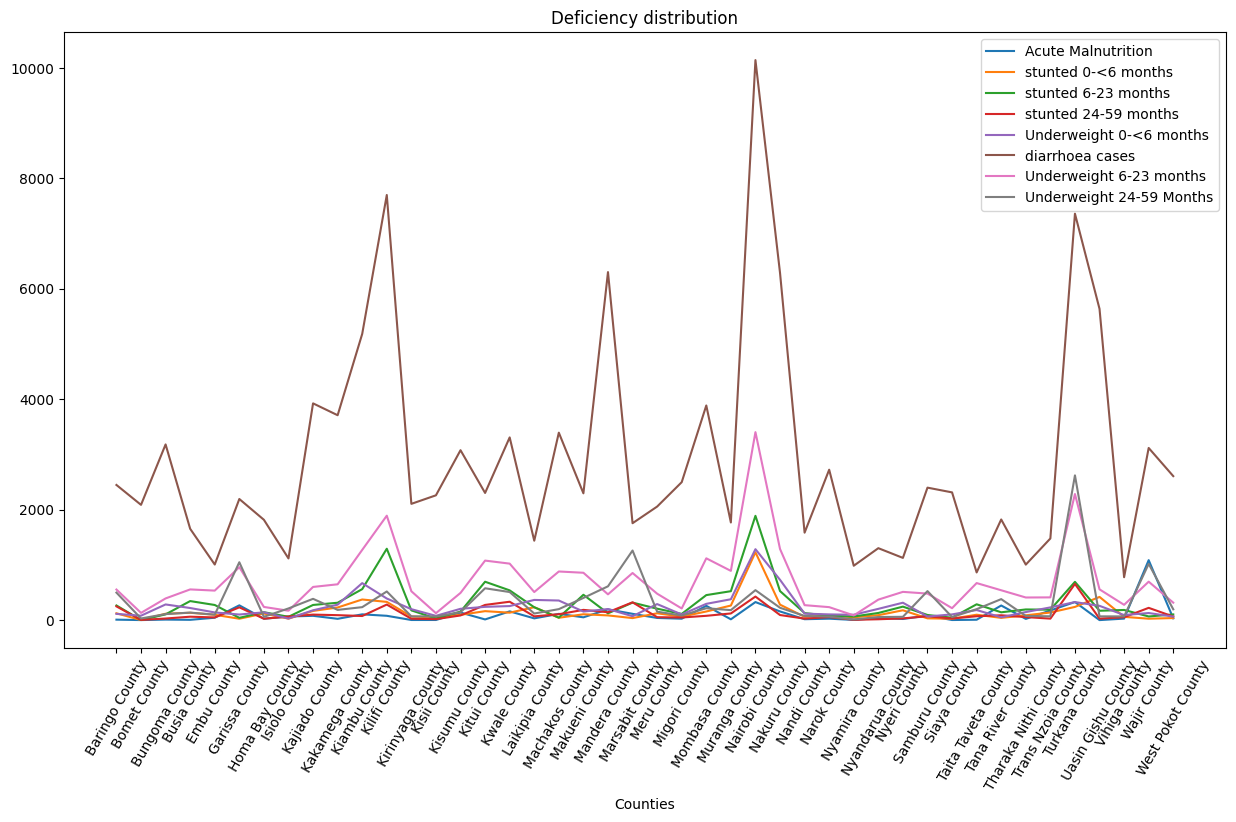

In [27]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(dfg['county'], dfg['Acute Malnutrition'], label='Acute Malnutrition')
ax.plot(dfg['county'], dfg['stunted 0-<6 months'], label='stunted 0-<6 months')
ax.plot(dfg['county'], dfg['stunted 6-23 months'], label='stunted 6-23 months')
ax.plot(dfg['county'], dfg['stunted 24-59 months'], label='stunted 24-59 months')
ax.plot(dfg['county'], dfg['Underweight 0-<6 months'], label='Underweight 0-<6 months')
ax.plot(dfg['county'], dfg['diarrhoea cases'], label='diarrhoea cases')
ax.plot(dfg['county'], dfg['Underweight 6-23 months'], label='Underweight 6-23 months' )
ax.plot(dfg['county'], dfg['Underweight 24-59 Months'], label='Underweight 24-59 Months')
plt.xticks(rotation=60)
plt.legend()
plt.xlabel("Counties")
plt.title("Deficiency distribution")
plt.show()

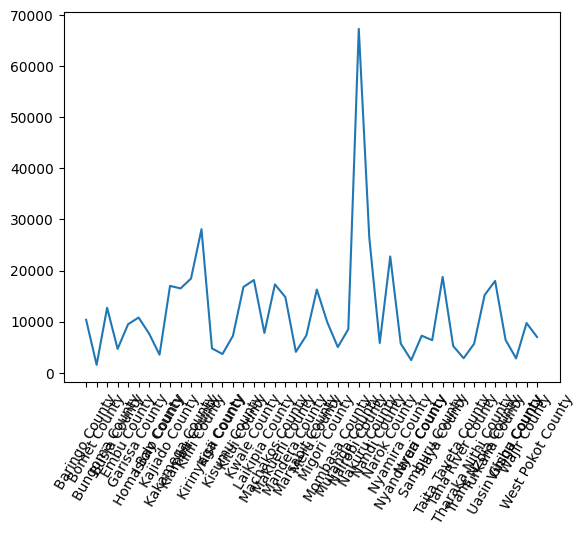

In [21]:
plt.plot(dfg['county'], dfg['Total Dewormed'], label='Total Dewormed')
plt.xticks(rotation=60)
plt.show()

In [24]:
dfp = df.groupby('period').mean().reset_index()
dfp.head()

,period,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months
0,Apr-21,5727.647059,90.676471,262.000000,176.147059,88.058824,2673.382353,255.617647,617.764706,229.617647
1,Apr-22,4813.187500,87.843750,339.187500,157.062500,114.812500,2935.156250,243.593750,684.665625,301.875000
2,Apr-23,6327.583333,142.083333,376.555556,153.694444,209.666667,3433.527778,260.694444,964.166667,624.527778
3,Aug-21,5011.967742,60.806452,244.096774,149.354839,88.258065,2731.645161,279.645161,558.645161,259.290323
4,Aug-22,4633.631579,77.500000,306.105263,135.578947,101.736842,2559.105263,256.368421,678.500000,315.868421


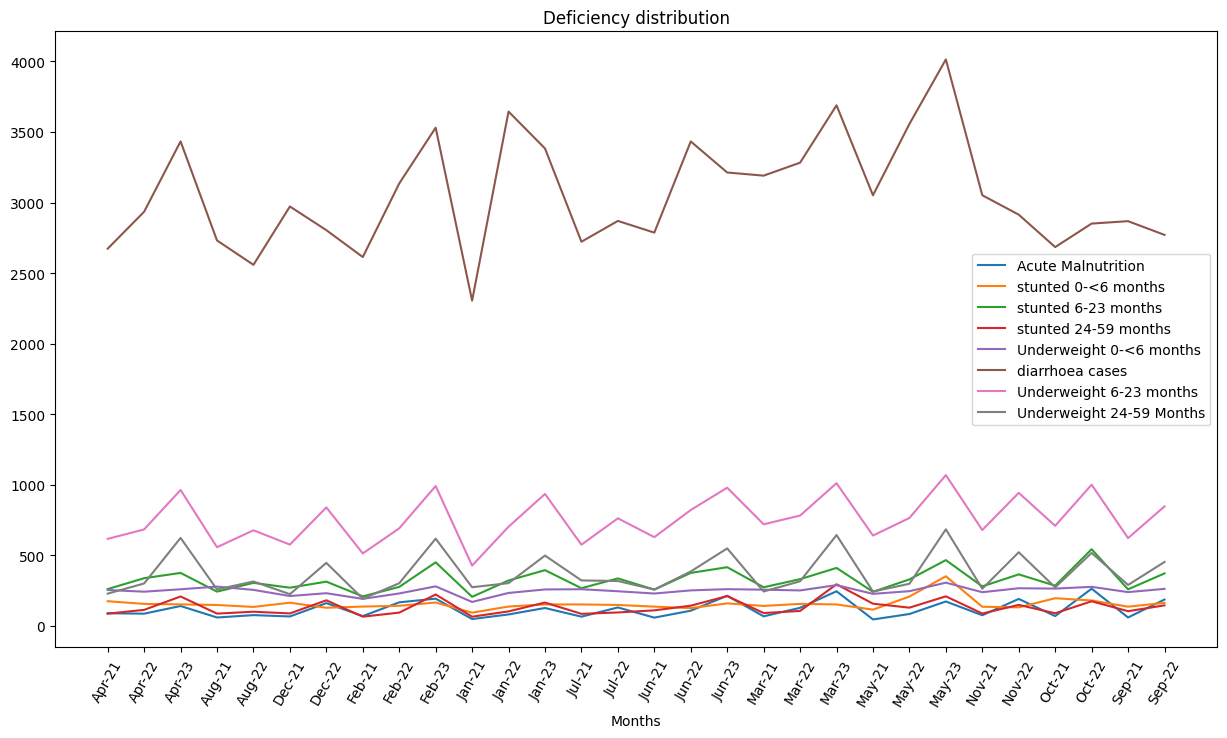

In [28]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(dfp['period'], dfp['Acute Malnutrition'], label='Acute Malnutrition')
ax.plot(dfp['period'], dfp['stunted 0-<6 months'], label='stunted 0-<6 months')
ax.plot(dfp['period'], dfp['stunted 6-23 months'], label='stunted 6-23 months')
ax.plot(dfp['period'], dfp['stunted 24-59 months'], label='stunted 24-59 months')
ax.plot(dfp['period'], dfp['Underweight 0-<6 months'], label='Underweight 0-<6 months')
ax.plot(dfp['period'], dfp['diarrhoea cases'], label='diarrhoea cases')
ax.plot(dfp['period'], dfp['Underweight 6-23 months'], label='Underweight 6-23 months' )
ax.plot(dfp['period'], dfp['Underweight 24-59 Months'], label='Underweight 24-59 Months')
plt.xticks(rotation=60)
plt.legend()
plt.xlabel("Months")
plt.title("Deficiency distribution")
plt.show()

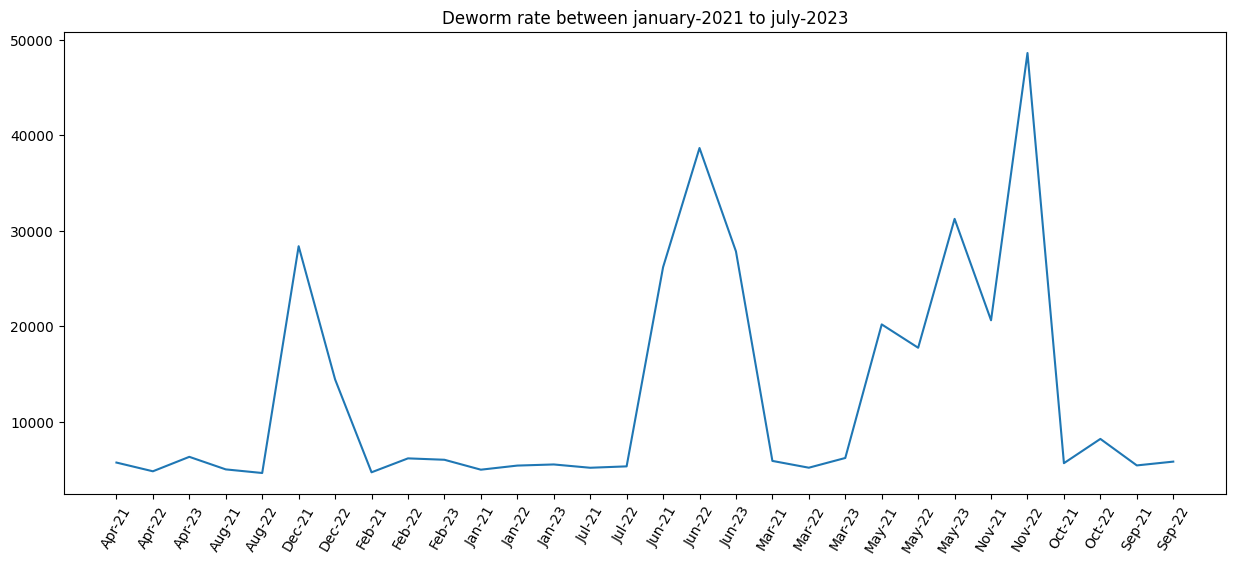

In [47]:
# monthly deworming rate
plt.figure(figsize=(15,6))
plt.plot(dfp['period'], dfp['Total Dewormed'], label='Total Dewormed')
plt.xticks(rotation=60)
plt.title("Deworm rate between january-2021 to july-2023")
plt.show()

In [36]:
dfg.sample(2)

,county,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months,acute_perc
36,Tana River County,2823.700000,265.133333,142.233333,41.166667,88.0,1822.666667,51.266667,540.933333,380.533333,9.39
18,Machakos County,17284.866667,113.466667,45.666667,43.166667,107.1,3394.033333,355.233333,880.886667,199.433333,0.66


In [35]:
# creating a new column malnutrition rate in relation to total dewormed 
dfg['acute_perc'] = round(dfg['Acute Malnutrition']/dfg['Total Dewormed'], 4)*100

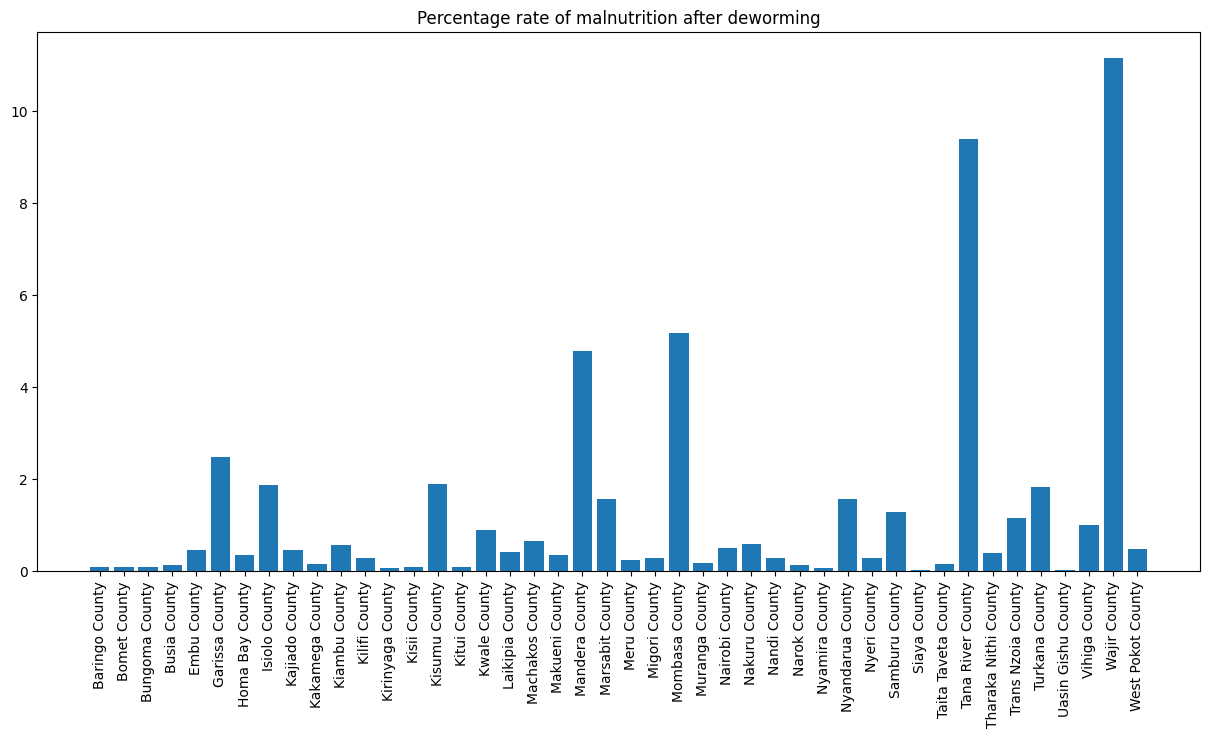

In [48]:
plt.figure(figsize=(15,7))
plt.bar(dfg['county'],dfg['acute_perc'])
plt.xticks(rotation=90)
plt.title("Percentage rate of malnutrition after deworming")
plt.show()

Few counties like "Wajir", "Tana River", "Mombasa", "Mandera" leads with high rate of malnutrition despite deworming.

In [51]:
features = [ 'Acute Malnutrition', "stunted 6-23 months", "stunted 0-<6 months",
            'stunted 24-59 months', "diarrhoea cases", "Underweight 0-<6 months",
            "Underweight 6-23 months", "Underweight 24-59 Months"]
df_rate = dfg.copy()

for feat in features:
    df_rate[feat] = round(df_rate[feat]/df_rate['Total Dewormed'], 4)*100


In [52]:
df_rate.head(2)

,county,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months,acute_perc
0,Baringo County,100.0,8.82,265.64,124.11,249.14,2447.43,113.39,554.12,498.52,0.09
1,Bomet County,100.0,1.40,2.20,2.20,4.20,2087.20,80.60,131.60,30.60,0.09


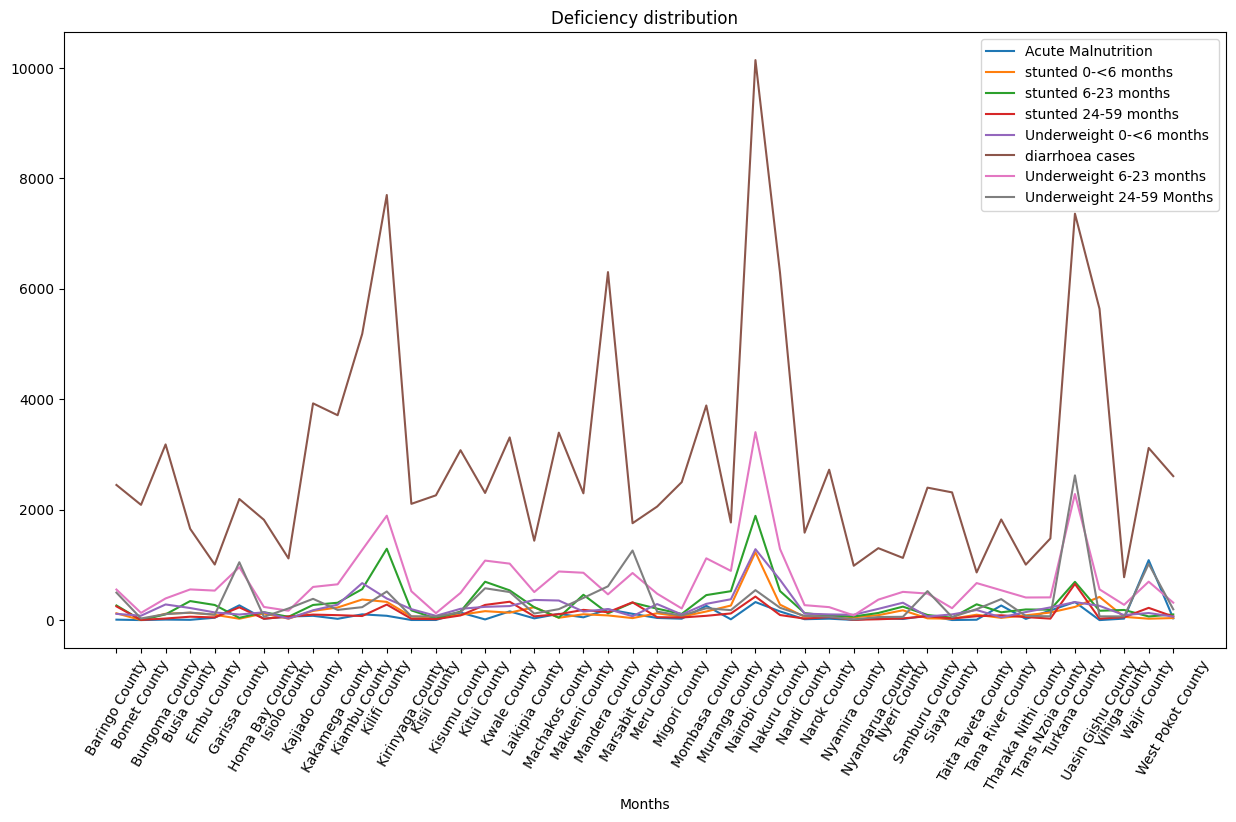

In [53]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(df_rate['county'], df_rate['Acute Malnutrition'], label='Acute Malnutrition')
ax.plot(df_rate['county'], df_rate['stunted 0-<6 months'], label='stunted 0-<6 months')
ax.plot(df_rate['county'], df_rate['stunted 6-23 months'], label='stunted 6-23 months')
ax.plot(df_rate['county'], df_rate['stunted 24-59 months'], label='stunted 24-59 months')
ax.plot(df_rate['county'], df_rate['Underweight 0-<6 months'], label='Underweight 0-<6 months')
ax.plot(df_rate['county'], df_rate['diarrhoea cases'], label='diarrhoea cases')
ax.plot(df_rate['county'], df_rate['Underweight 6-23 months'], label='Underweight 6-23 months' )
ax.plot(df_rate['county'], df_rate['Underweight 24-59 Months'], label='Underweight 24-59 Months')
plt.xticks(rotation=60)
plt.legend()
plt.xlabel("Months")
plt.title("Deficiency distribution")
plt.show()